# Natural Gas Price Analysis and Forecast


## Natural gas price analysis and prediction using VAR, ARIMA, MLP and LSTM

### Install and import libraries

In [312]:
Install packages
install.packages('ggplot2')
install.packages('gridExtra')
install.packages("vars")
install.packages("astsa")
install.packages('posterior')
install.packages('lubridate')
install.packages('forecast')
install.packages('dplyr')
install.packages('readr')
install.packages('BVAR')
install.packages('bsts')

also installing the dependency ‘Boom’





The downloaded binary packages are in
	/var/folders/pl/fjcn6k9967l3frclljmjdg2h0000gn/T//RtmprwHIKx/downloaded_packages


In [1]:
# Import libraries
library(ggplot2)
library(gridExtra)
library(vars)
library(astsa)
library(readr)
library(posterior)
library(lubridate)
library(dplyr)
library(ggplot2)
library(forecast)
library(quantmod)
library(BVAR)
library(tseries)
library(bsts)

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest

This is posterior version 1.4.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R

### Import dataset

In [2]:
# Import dataset
data = read.csv('dataset.csv')
head(data)

,date,NG.Price,WTI.Price,HO.Price,Drill.Act,HTDD,CLDD,NG.prod,NG.cons,NG.store,NG.import,NG.export,GDP
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1997-01-01,3.45,25.13,2.447000,822,288.1,0.0,1700410,1376267,5843054,278288,12028,11263.75
2,1997-02-01,2.15,22.18,2.321000,849,191.3,0.0,1540644,1177155,5481074,240545,12443,11343.21
3,1997-03-01,1.89,20.97,2.195000,897,122.9,0.6,1710583,965451,5335550,256985,16276,11268.44
4,1997-04-01,2.03,19.70,2.158714,901,60.2,16.1,1630357,701985,5393231,238178,13872,11519.01
5,1997-05-01,2.25,20.82,2.122429,924,4.2,122.7,1692637,487423,5704423,241732,10097,11409.24
6,1997-06-01,2.20,19.26,2.086143,976,0.5,131.7,1603091,317688,6087891,232118,9527,11510.12


### Data Preprocessing

In [3]:
# Data Preprocessing
# Remove NA values
data = na.omit(data)

# Convert date type from chr to date
data$date = as.Date(data$date)
# summary of the data
summary(data)

      date               NG.Price        WTI.Price         HO.Price    
 Min.   :1997-01-01   Min.   : 1.630   Min.   : 11.35   Min.   :1.735  
 1st Qu.:2003-07-01   1st Qu.: 2.670   1st Qu.: 31.26   1st Qu.:3.062  
 Median :2010-01-01   Median : 3.620   Median : 54.95   Median :4.604  
 Mean   :2009-12-31   Mean   : 4.255   Mean   : 57.43   Mean   :4.546  
 3rd Qu.:2016-07-01   3rd Qu.: 5.390   3rd Qu.: 78.12   3rd Qu.:5.750  
 Max.   :2023-01-01   Max.   :13.420   Max.   :133.88   Max.   :8.240  
   Drill.Act         HTDD            CLDD           NG.prod       
 Min.   : 250   Min.   :  0.0   Min.   :  0.00   Min.   :1400941  
 1st Qu.: 805   1st Qu.:  1.4   1st Qu.:  0.00   1st Qu.:1670166  
 Median :1048   Median : 69.8   Median : 13.40   Median :1842284  
 Mean   :1160   Mean   :114.0   Mean   : 59.91   Mean   :2100608  
 3rd Qu.:1683   3rd Qu.:211.1   3rd Qu.:126.80   3rd Qu.:2412475  
 Max.   :2017   Max.   :387.1   Max.   :250.20   Max.   :3408649  
    NG.cons           NG.st

### Plot each dataset

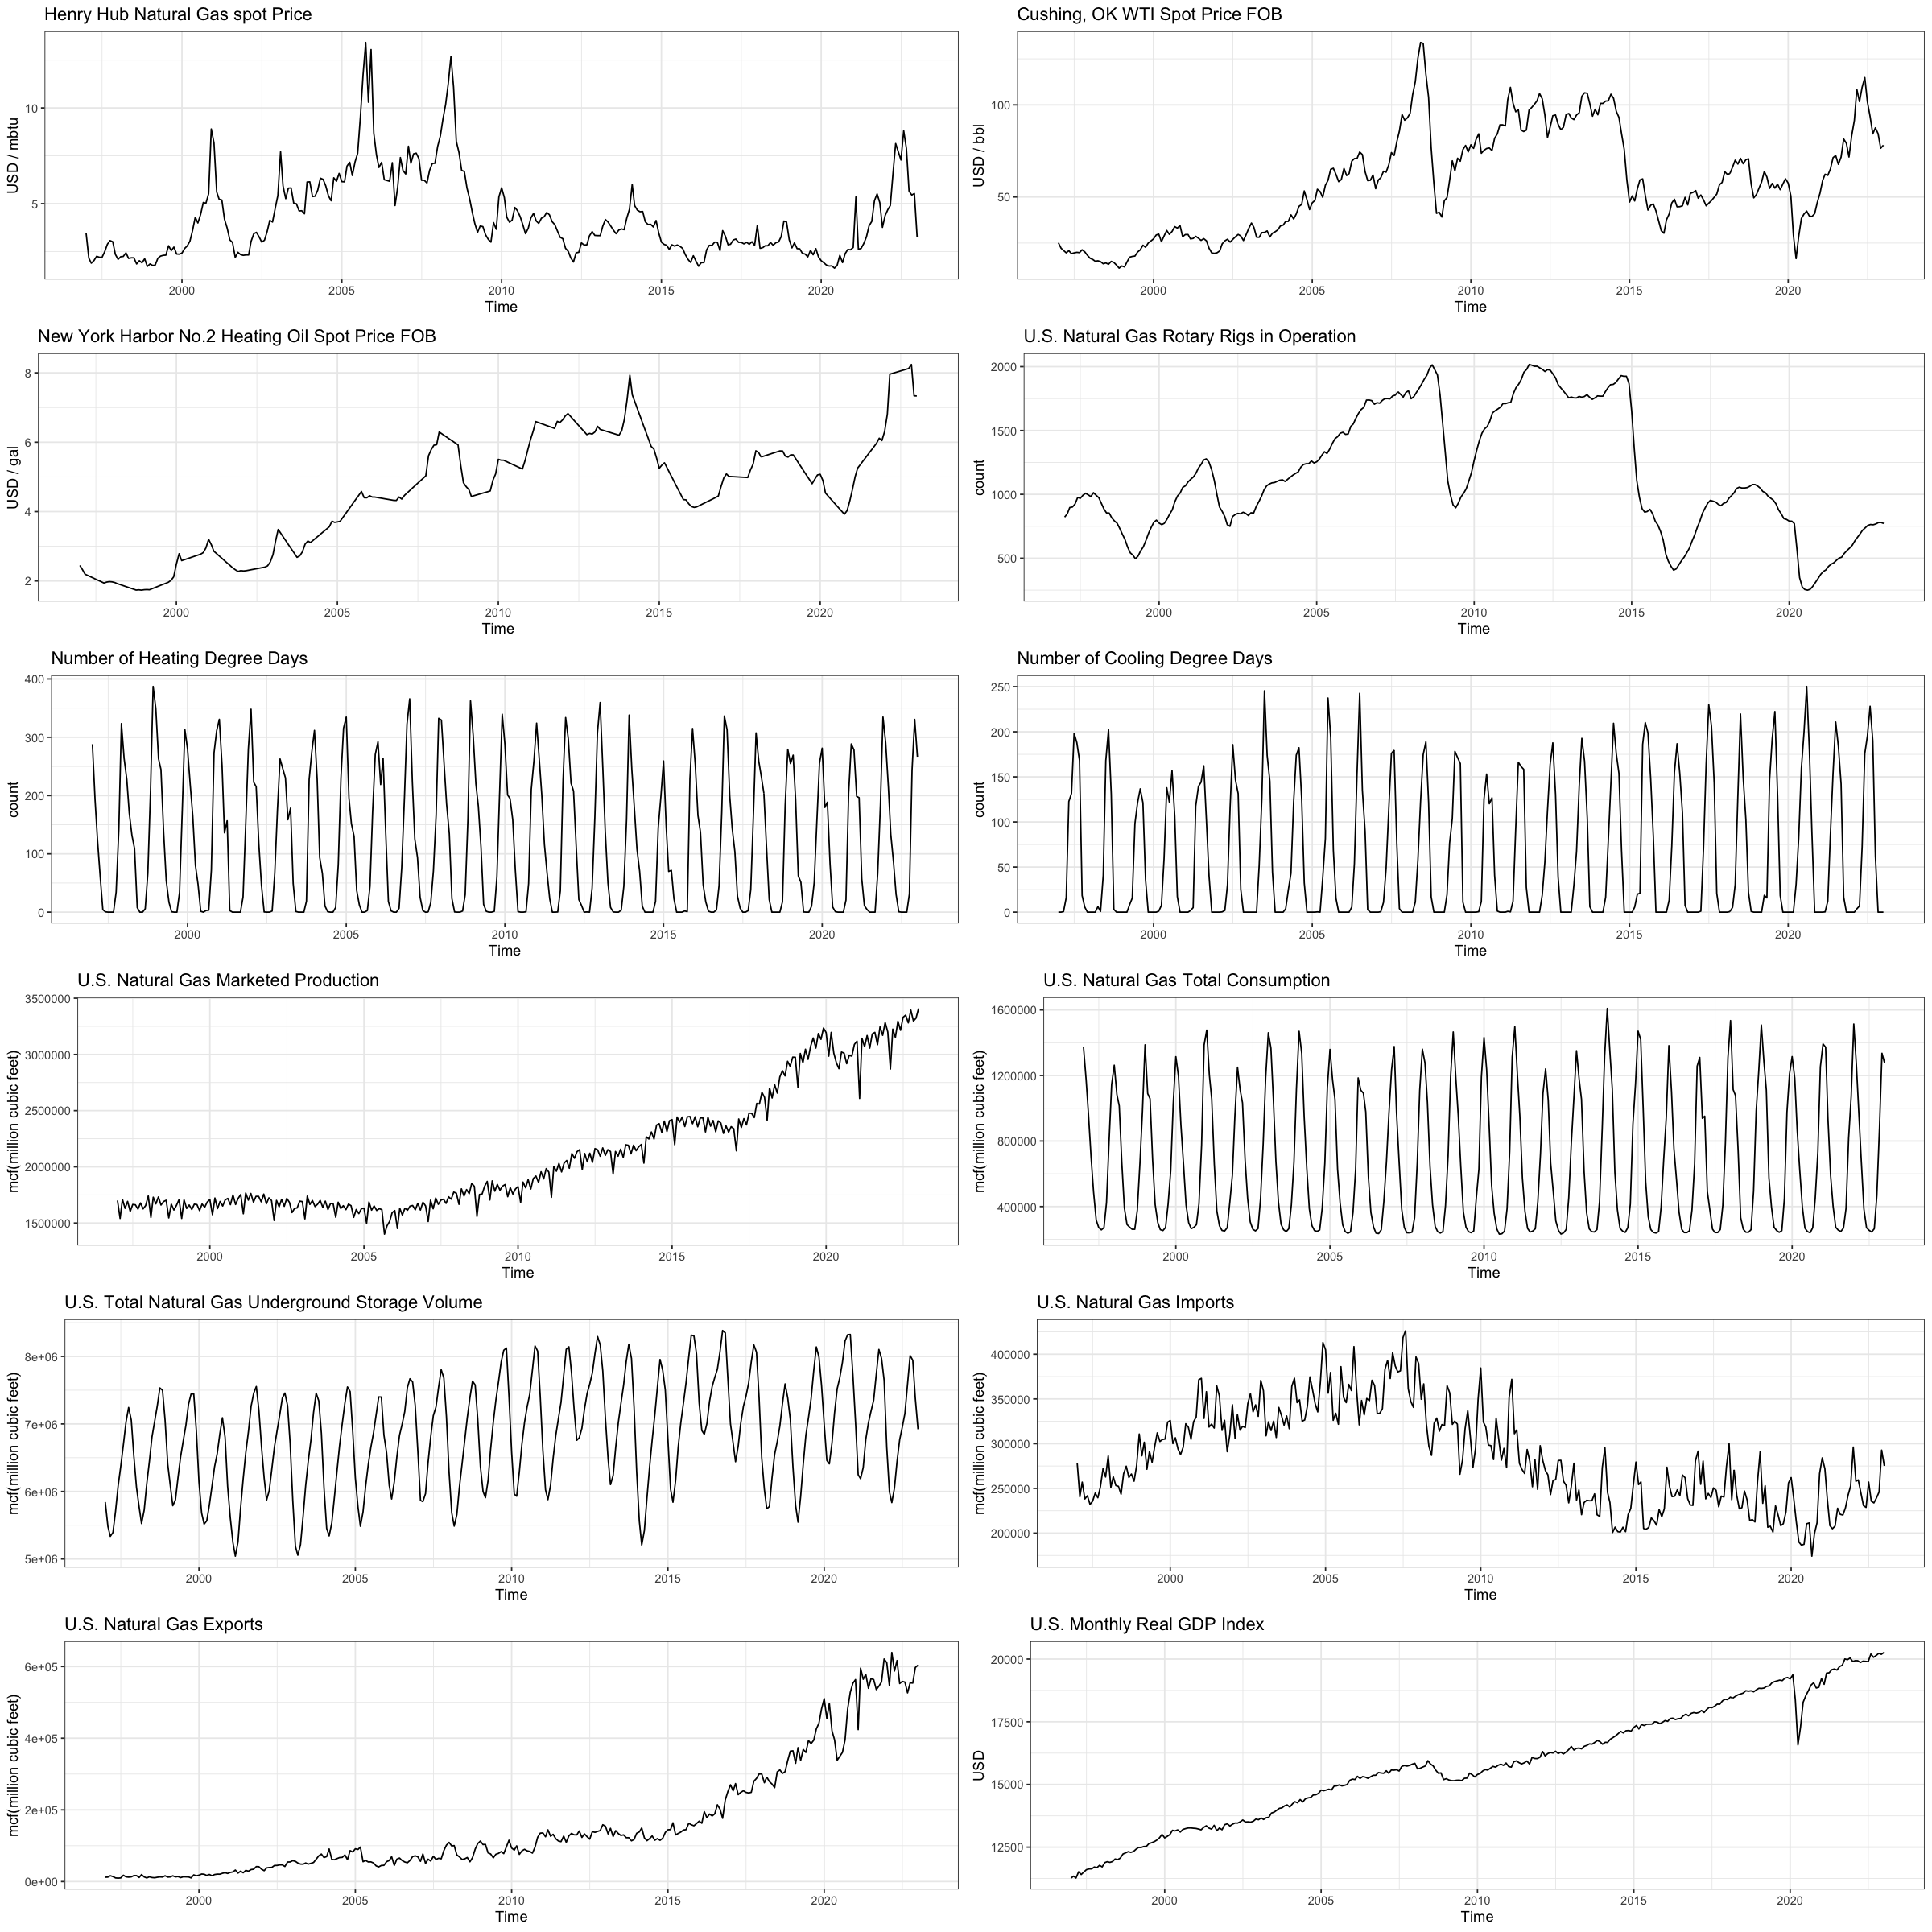

In [4]:
# Plot features and the response

options(repr.plot.width = 20, repr.plot.height = 20)
par(mfrow = c(4,3))

p1 = ggplot(data) +
        geom_line(aes(x = date, y = NG.Price)) +
        xlab("Time") +
        ylab("USD / mbtu") +
        ggtitle("Henry Hub Natural Gas spot Price") + 
        theme_bw()

p2 = ggplot(data) +
        geom_line(aes(x = date, y = WTI.Price)) +
        xlab("Time") +
        ylab("USD / bbl") +
        ggtitle("Cushing, OK WTI Spot Price FOB") + 
        theme_bw()

p3 = ggplot(data) +
        geom_line(aes(x = date, y = HO.Price)) +
        xlab("Time") +
        ylab("USD / gal") +
        ggtitle("New York Harbor No.2 Heating Oil Spot Price FOB ") + 
        theme_bw()

p4 = ggplot(data) +
        geom_line(aes(x = date, y = Drill.Act)) +
        xlab("Time") +
        ylab("count") +
        ggtitle("U.S. Natural Gas Rotary Rigs in Operation") + 
        theme_bw()

p5 = ggplot(data) +
        geom_line(aes(x = date, y = HTDD)) +
        xlab("Time") +
        ylab("count") +
        ggtitle("Number of Heating Degree Days") + 
        theme_bw()

p6 = ggplot(data) +
        geom_line(aes(x = date, y = CLDD)) +
        xlab("Time") +
        ylab("count") +
        ggtitle("Number of Cooling Degree Days") + 
        theme_bw()

p7 = ggplot(data) +
        geom_line(aes(x = date, y = NG.prod)) +
        xlab("Time") +
        ylab("mcf(million cubic feet)") +
        ggtitle("U.S. Natural Gas Marketed Production") + 
        theme_bw()

p8 = ggplot(data) +
        geom_line(aes(x = date, y = NG.cons)) +
        xlab("Time") +
        ylab("mcf(million cubic feet)") +
        ggtitle("U.S. Natural Gas Total Consumption") + 
        theme_bw()

p9 = ggplot(data) +
        geom_line(aes(x = date, y = NG.store)) +
        xlab("Time") +
        ylab("mcf(million cubic feet)") +
        ggtitle("U.S. Total Natural Gas Underground Storage Volume") + 
        theme_bw()

p10 = ggplot(data) +
        geom_line(aes(x = date, y = NG.import)) +
        xlab("Time") +
        ylab("mcf(million cubic feet)") +
        ggtitle("U.S. Natural Gas Imports") + 
        theme_bw()

p11 = ggplot(data) +
        geom_line(aes(x = date, y = NG.export)) +
        xlab("Time") +
        ylab("mcf(million cubic feet)") +
        ggtitle("U.S. Natural Gas Exports") + 
        theme_bw()

p12 = ggplot(data) +
        geom_line(aes(x = date, y = GDP)) +
        xlab("Time") +
        ylab("USD") +
        ggtitle("U.S. Monthly Real GDP Index") + 
        theme_bw()

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, ncol = 2, widths = c(1,1))

### Total degree-days

In [5]:
# Heating Degree Days
htdd = matrix(data$HTDD, ncol = 12, byrow = TRUE)
htdd = htdd[1:nrow(htdd)-1,]

# Cooling Degree Days
cldd = matrix(data$CLDD, ncol = 12, byrow = TRUE)
cldd = cldd[1:nrow(cldd)-1,]

# Total number of Heating + Cooling degree days each month
dd = htdd + cldd

# Average of Heating + Cooling days per each month
dd_avg = colMeans(htdd) + colMeans(cldd)

# Create a dataset total degree days - average degree days per month
dd_diff = matrix(NA, nrow = 26, ncol = 12)
for (i in 1:nrow(dd)){
    for (j in 1:ncol(dd)){
        dd_diff[i,j] = dd[i,j] - dd_avg[j]
    }
}

# Append dd_diff in the dataset
data$DD[dim(data)[1]] = data$HTDD[dim(data)[1]] + data$CLDD[dim(data)[1]] - dd_avg[1] # Jan of 2023 Value alone
data$DD[1:dim(data[1])-1] = dd_diff

# Remove HTDD, CLDD and date columns
data_final = data[-c(1,6,7)]; head(data_final)

Warning message in matrix(data$HTDD, ncol = 12, byrow = TRUE):
“data length [313] is not a sub-multiple or multiple of the number of rows [27]”
Warning message in matrix(data$CLDD, ncol = 12, byrow = TRUE):
“data length [313] is not a sub-multiple or multiple of the number of rows [27]”
Warning message in 1:dim(data[1]):
“numerical expression has 2 elements: only the first used”


,NG.Price,WTI.Price,HO.Price,Drill.Act,NG.prod,NG.cons,NG.store,NG.import,NG.export,GDP,DD
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,3.45,25.13,2.447000,822,1700410,1376267,5843054,278288,12028,11263.75,-9.803846
2,2.15,22.18,2.321000,849,1540644,1177155,5481074,240545,12443,11343.21,-34.403846
3,1.89,20.97,2.195000,897,1710583,965451,5335550,256985,16276,11268.44,51.196154
4,2.03,19.70,2.158714,901,1630357,701985,5393231,238178,13872,11519.01,-18.203846
5,2.25,20.82,2.122429,924,1692637,487423,5704423,241732,10097,11409.24,32.896154
6,2.20,19.26,2.086143,976,1603091,317688,6087891,232118,9527,11510.12,50.196154


In [6]:
# Shift DD values to make all positives to take log
data_final$DD = data_final$DD - min(data_final$DD) + 1
min(data_final)

[1] 1

### Case-1. Take Log, no scailing

In [7]:
# Take log on the final dataset
data_log = log(data_final)

y = data_log$NG.Price # response. No scailing for the response
X = data_log[,2:ncol(data_log)] # predictors
# Since we take logarithm, data scailing won't be necessary here.

### Case-2. Take scailing, no log

In [8]:
# Data Scailing
y = data_final$NG.Price # response. No scailing for the response
X = data_final[,2:ncol(data_final)] # predictors
X = scale(X)

### Case-3. No log, No scailing

In [9]:
y = data_final$NG.Price 
X = data_final[,2:ncol(data_final)]

### Case-4. Log and Scailing

In [10]:
# Take log on the final dataset
data_log = log(data_final)

y = data_log$NG.Price # response. No scailing for the response
X = data_log[,2:ncol(data_log)] 
X = scale(X)

**We decide to use the case-1 Taking log only**

### Use AIC, BIC to find the optimal lag 'p'

In [11]:
final_data = cbind(y,X) # Final dataset after taking log and scailing.

# Separate the dataset, first 80% for training, last 20% for the test
train_index = dim(final_data)[1]*0.8

final_data_train = final_data[1:train_index,];
dim(final_data_train)
final_data_test = final_data[-(1:train_index),];
dim(final_data_test)

y_act = final_data[,1]; length(y_act) # actural y_value
y_train = y_act[1:train_index]; length(y_train)
y_test = y_act[train_index:length(y_act)]; length(y_test)

maxlag = 10  # maximum number of lags to consider

AIC_value = 0
BIC_value = 0

for (i in 1:maxlag){
    model = VAR(final_data, p = i, type = 'both')
    AIC_value[i] = AIC(model)
    BIC_value[i] = BIC(model)   
}

# Find the order that minimizes AIC and BIC
AIC_min = which(AIC_value == min(AIC_value))
BIC_min = which(BIC_value == min(BIC_value))

# Print the optimal orders
cat("AIC optimal order: VAR(", AIC_min, ")", "\n")
cat("BIC optimal order: VAR(", BIC_min, ")", "\n")

head(final_data)

[1] 250  11

[1] 63 11

[1] 313

[1] 250

[1] 63

AIC optimal order: VAR( 6 ) 
BIC optimal order: VAR( 2 ) 


,y,WTI.Price,HO.Price,Drill.Act,NG.prod,NG.cons,NG.store,NG.import,NG.export,GDP,DD
1,1.2383742,-1.193494,-1.309681,-0.5323641,-0.7585866,1.4399360,-1.2603193,-0.05001277,-1.840627,-2.188604,-0.08738952
2,0.7654678,-1.411990,-1.437408,-0.4627776,-1.1711095,1.1992907,-1.7985580,-0.81236303,-1.810035,-2.141892,-0.76900330
3,0.6365768,-1.510148,-1.572265,-0.3443626,-0.7336483,0.8939912,-2.0250308,-0.46656816,-1.567858,-2.185837,1.06540154
4,0.7080358,-1.619463,-1.612539,-0.3347825,-0.9344779,0.4032536,-1.9345339,-0.86408742,-1.711991,-2.039699,-0.29936708
5,0.8109302,-1.522709,-1.653496,-0.2805090,-0.7777423,-0.1584675,-1.4624076,-0.78661566,-1.998450,-2.103323,0.77302356
6,0.7884574,-1.658987,-1.695160,-0.1626241,-1.0049900,-0.8176372,-0.9148493,-0.99889157,-2.050855,-2.044829,1.05029962


BIC is chosen over AIC to avoid overfitting. Because the model has relatively large number of parameters compared to the sample size, using the result of AIC of p = 5, is likely to return overfitting. Thus, lag p is set to 2 for VAR analysis.

In [12]:
fitvar = VAR(final_data, p=BIC_min, type = 'both')
summary(fitvar)
coef(fitvar)$y


VAR Estimation Results:
Endogenous variables: y, WTI.Price, HO.Price, Drill.Act, NG.prod, NG.cons, NG.store, NG.import, NG.export, GDP, DD 
Deterministic variables: both 
Sample size: 311 
Log Likelihood: 2087.261 
Roots of the characteristic polynomial:
0.9723 0.9723 0.972 0.972 0.8888 0.8888 0.8141 0.8141 0.7827 0.7827 0.6562 0.6562 0.6107 0.5122 0.459 0.459 0.3189 0.3189 0.3169 0.255 0.255 0.2173
Call:
VAR(y = final_data, p = BIC_min, type = "both")


Estimation results for equation y: 
y = y.l1 + WTI.Price.l1 + HO.Price.l1 + Drill.Act.l1 + NG.prod.l1 + NG.cons.l1 + NG.store.l1 + NG.import.l1 + NG.export.l1 + GDP.l1 + DD.l1 + y.l2 + WTI.Price.l2 + HO.Price.l2 + Drill.Act.l2 + NG.prod.l2 + NG.cons.l2 + NG.store.l2 + NG.import.l2 + NG.export.l2 + GDP.l2 + DD.l2 + const + trend 

              Estimate Std. Error t value Pr(>|t|)    
y.l1          0.751169   0.067118  11.192  < 2e-16 ***
WTI.Price.l1 -0.019578   0.059899  -0.327 0.744017    
HO.Price.l1   0.371814   0.136174   2.730 0

,Estimate,Std. Error,t value,Pr(>|t|)
y.l1,0.751169108,0.067117893,11.1917863,2.277743e-24
WTI.Price.l1,-0.019578329,0.059899471,-0.3268531,7.440172e-01
HO.Price.l1,0.371813582,0.136174408,2.7304219,6.716596e-03
Drill.Act.l1,-0.110629885,0.086755373,-1.2751935,2.032721e-01
NG.prod.l1,-0.013856330,0.054220081,-0.2555572,7.984759e-01
NG.cons.l1,0.032542953,0.038933502,0.8358599,4.039291e-01
NG.store.l1,-0.025538673,0.042231517,-0.6047302,5.458361e-01
NG.import.l1,-0.041908559,0.025829618,-1.6225001,1.057942e-01
NG.export.l1,0.192698541,0.068476416,2.8140863,5.229744e-03
GDP.l1,0.134467553,0.147457793,0.9119054,3.625839e-01


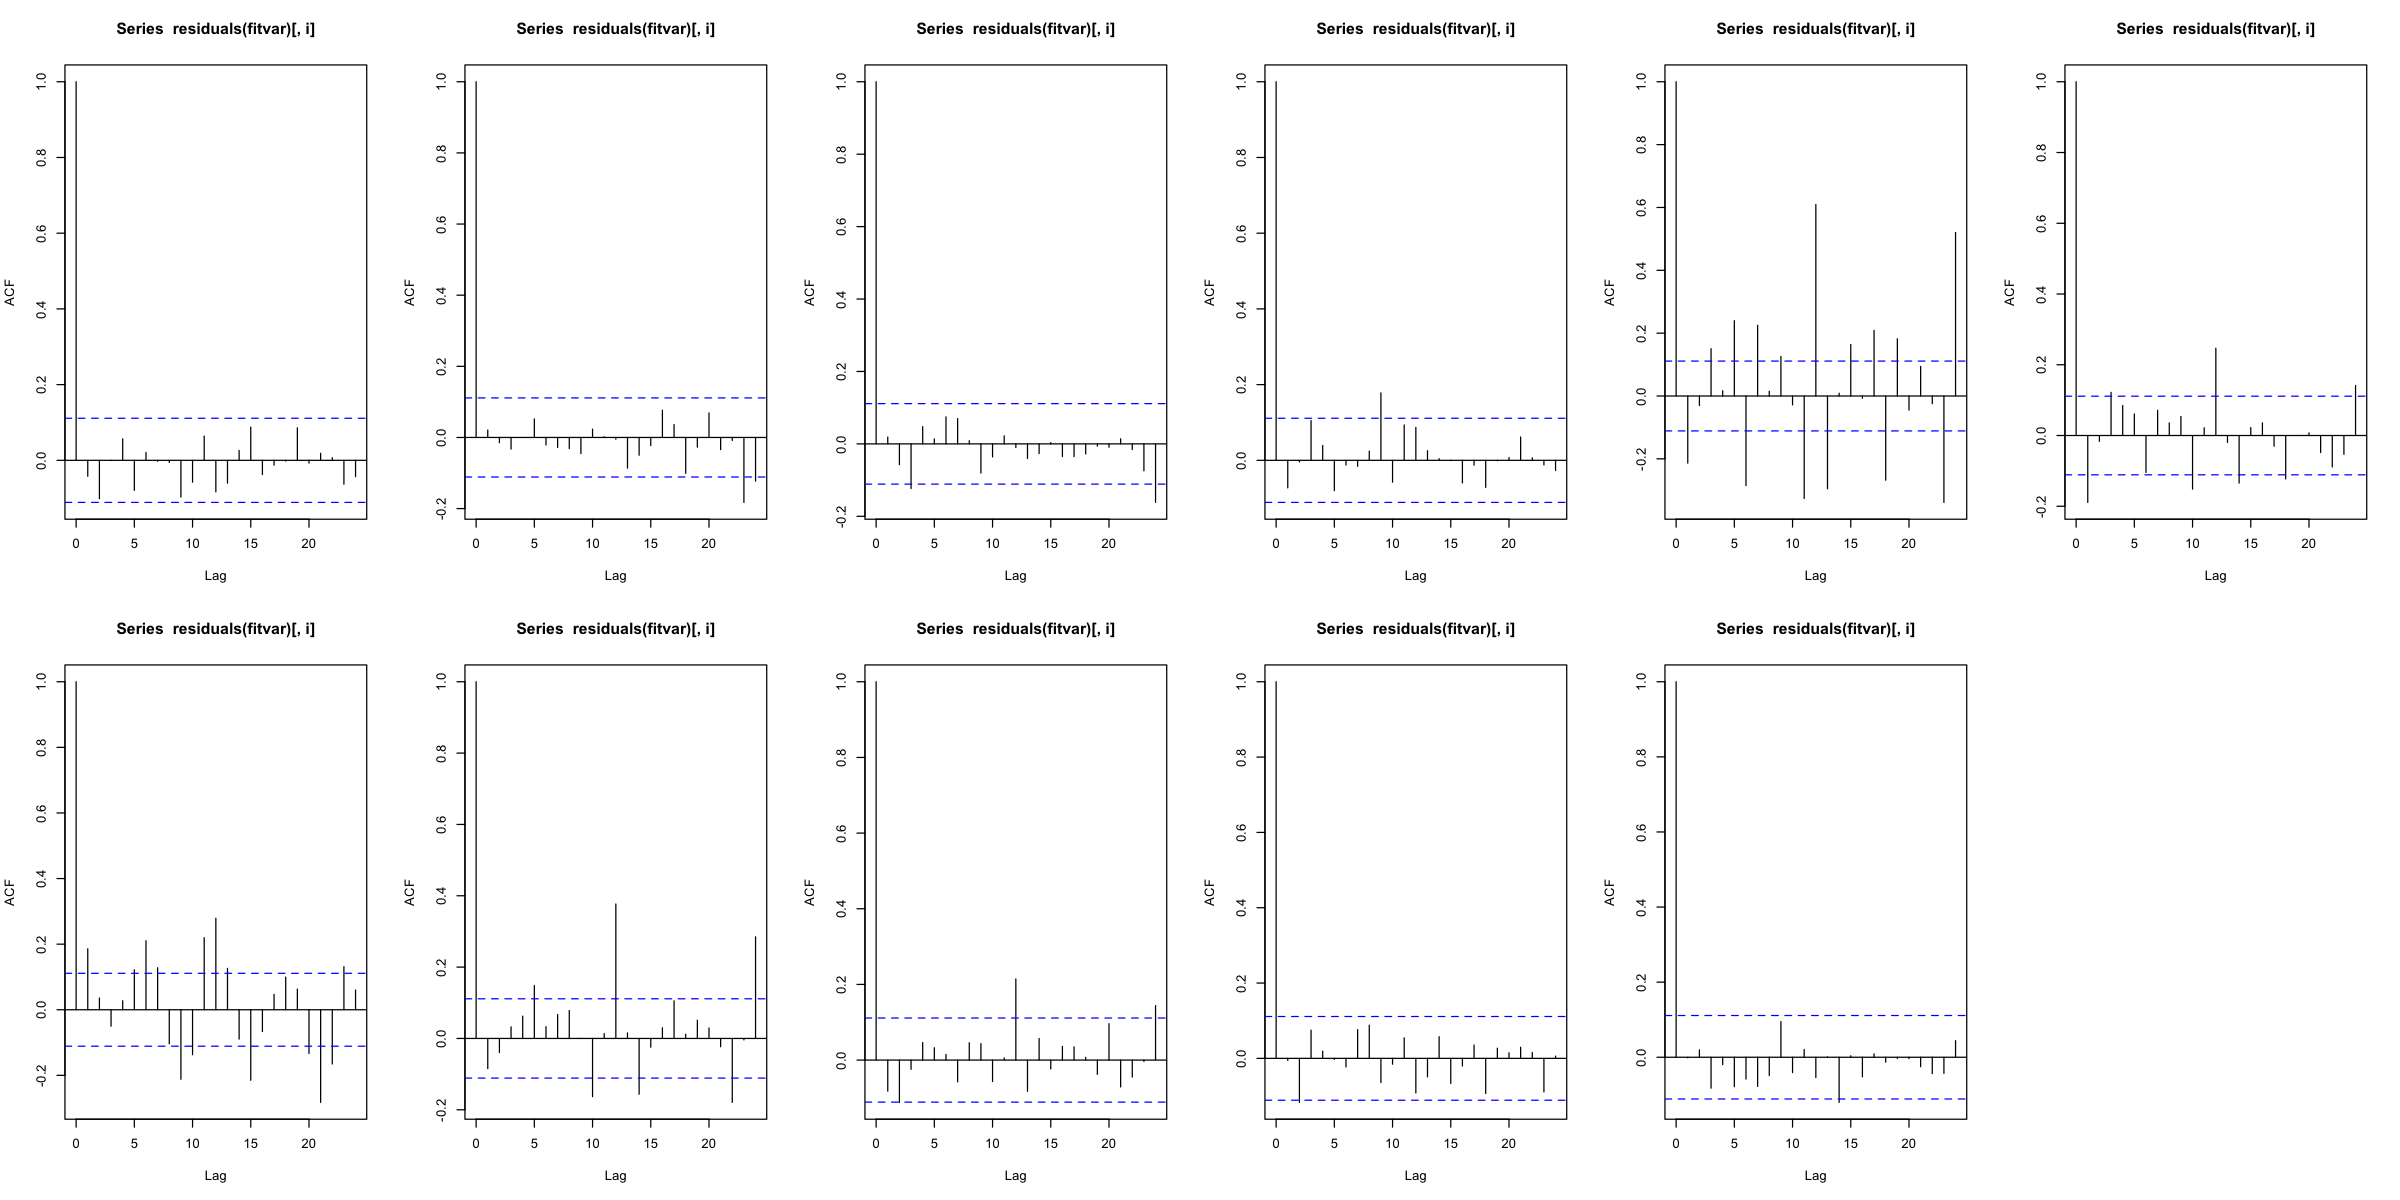

In [13]:
options(repr.plot.width = 20, repr.plot.height = 10)
par(mfrow = c(2,6))
for (i in 1:11){
    acf(residuals(fitvar)[,i])
}


It seems that some of the predictors are not stationary after taking VAR. I decided to do differencing to remove non-stationarity.

### Differencing of the non-stationary predictors

In [14]:

ng.prod = final_data[,5]
ng.prod.diff = diff(ng.prod)
ng.cons = final_data[,6]
ng.cons.diff = diff(ng.cons)
ng.store = final_data[,7]
ng.store.diff = diff(ng.store)
ng.import = final_data[,8]
ng.import.diff = diff(ng.import)
ng.export = final_data[,9]
ng.export.diff = diff(ng.export)

final_data_diff = final_data

final_data_diff[1,5] = 0; final_data_diff[2:313,5] = ng.prod.diff
final_data_diff[1,6] = 0; final_data_diff[2:313,6] = ng.cons.diff
final_data_diff[1,7] = 0; final_data_diff[2:313,7] = ng.store.diff
final_data_diff[1,8] = 0; final_data_diff[2:313,8] = ng.import.diff
final_data_diff[1,9] = 0; final_data_diff[2:313,9] = ng.export.diff

head(final_data_diff)

,y,WTI.Price,HO.Price,Drill.Act,NG.prod,NG.cons,NG.store,NG.import,NG.export,GDP,DD
1,1.2383742,-1.193494,-1.309681,-0.5323641,0.0000000,0.0000000,0.0000000,0.00000000,0.00000000,-2.188604,-0.08738952
2,0.7654678,-1.411990,-1.437408,-0.4627776,-0.4125229,-0.2406453,-0.5382387,-0.76235027,0.03059169,-2.141892,-0.76900330
3,0.6365768,-1.510148,-1.572265,-0.3443626,0.4374612,-0.3052995,-0.2264729,0.34579488,0.24217751,-2.185837,1.06540154
4,0.7080358,-1.619463,-1.612539,-0.3347825,-0.2008296,-0.4907376,0.0904969,-0.39751927,-0.14413334,-2.039699,-0.29936708
5,0.8109302,-1.522709,-1.653496,-0.2805090,0.1567356,-0.5617210,0.4721264,0.07747176,-0.28645905,-2.103323,0.77302356
6,0.7884574,-1.658987,-1.695160,-0.1626241,-0.2272477,-0.6591697,0.5475583,-0.21227591,-0.05240527,-2.044829,1.05029962


In [15]:
fitvar_diff = VAR(final_data_diff, p=BIC_min, type = 'both')

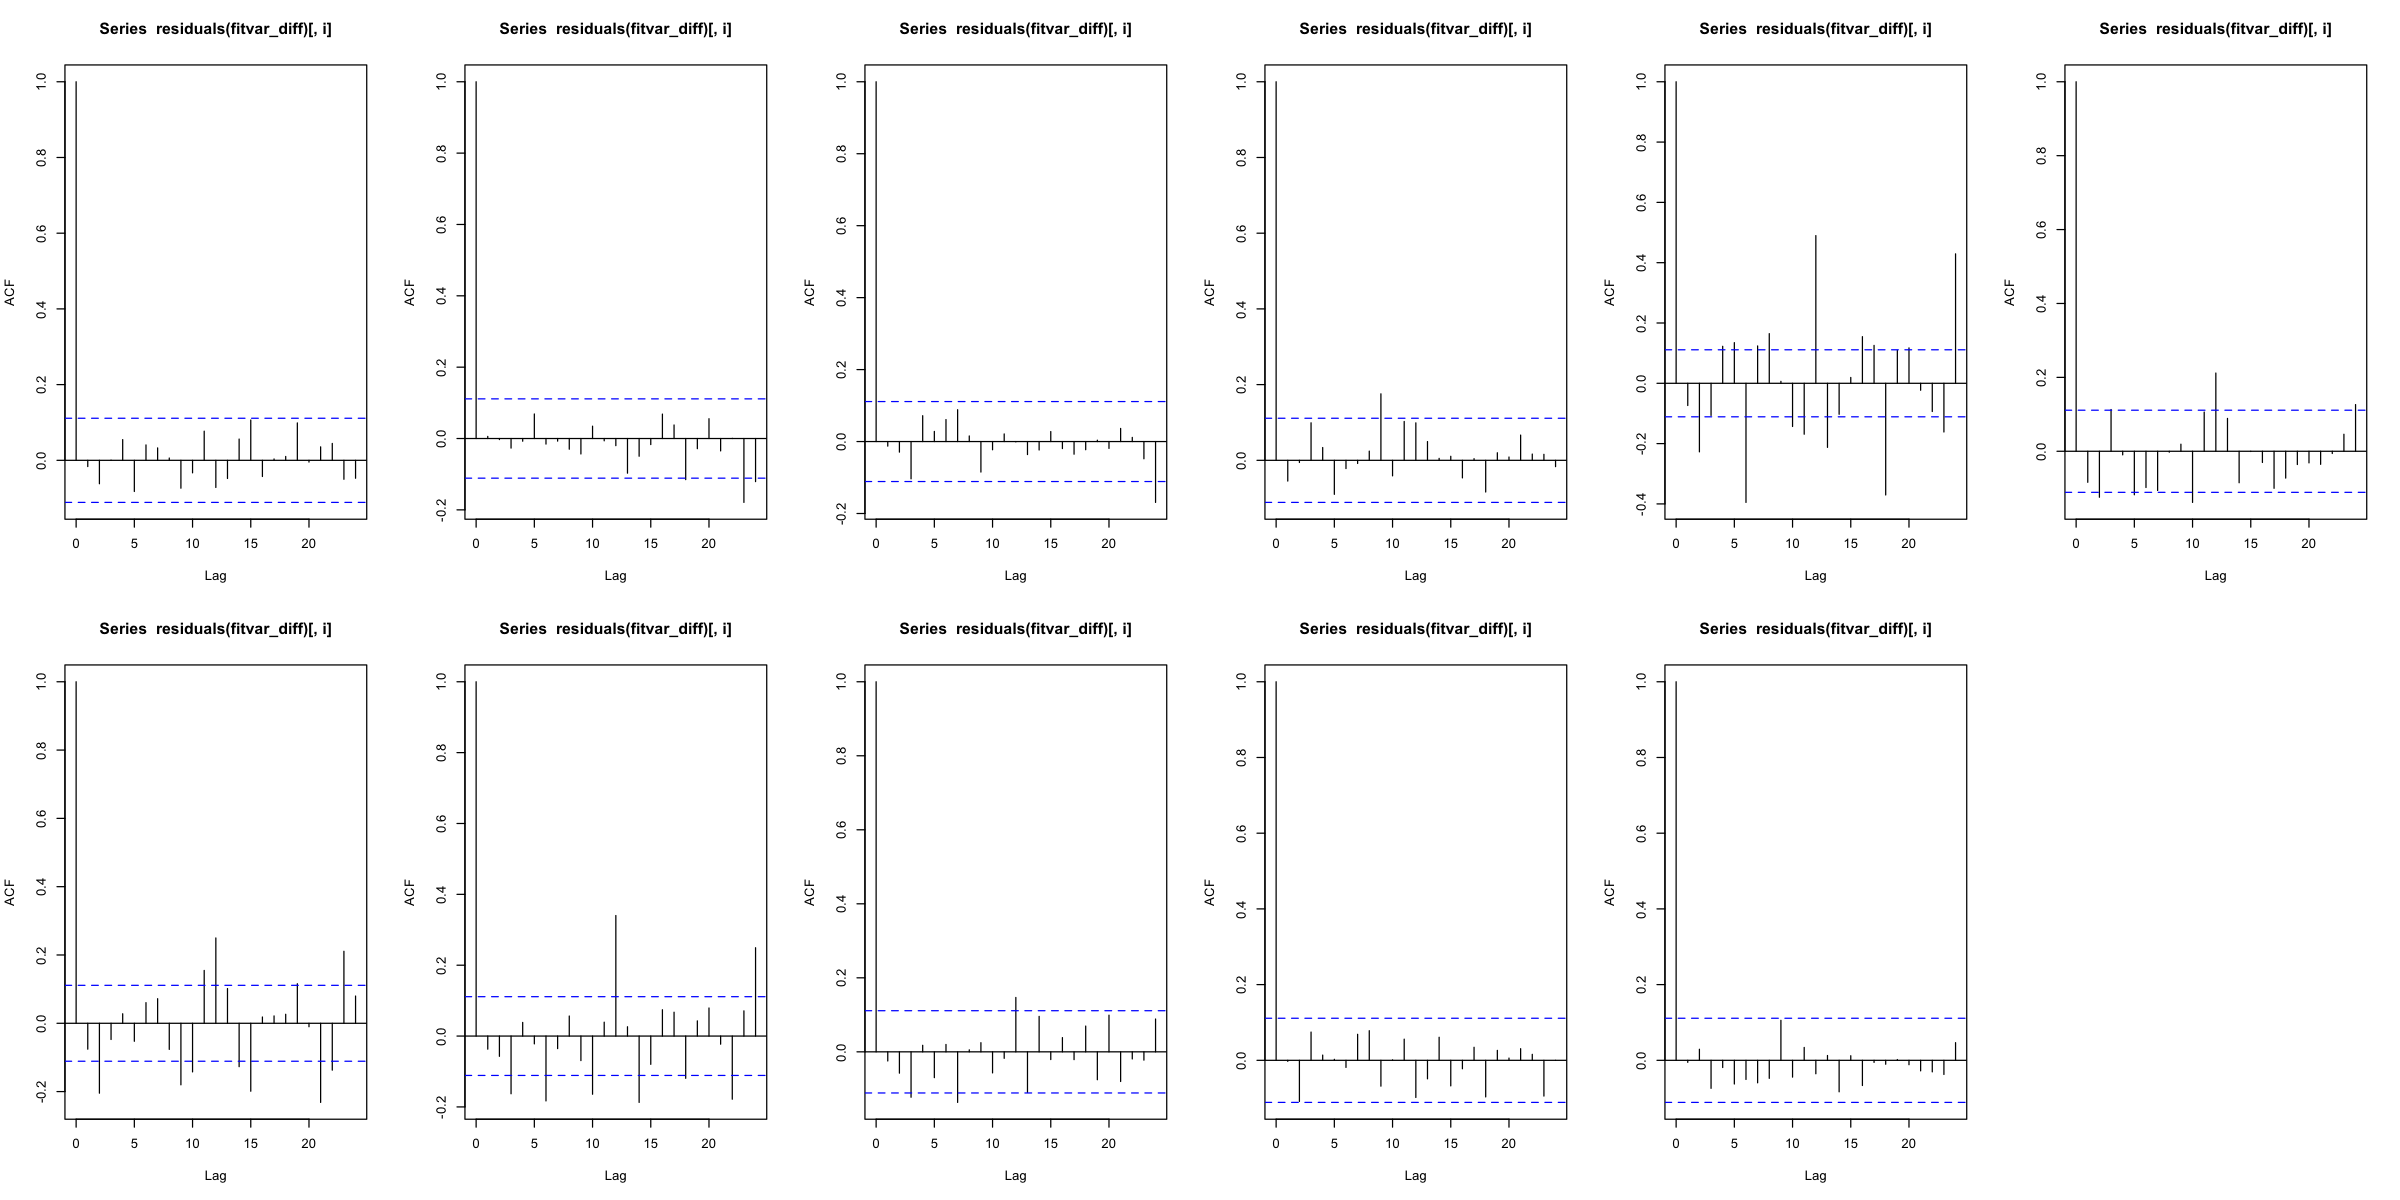

In [16]:
options(repr.plot.width = 20, repr.plot.height = 10)
par(mfrow = c(2,6))
for (i in 1:11){
    acf(residuals(fitvar_diff)[,i])
}

After taking difference, some of the predictors look getting closer to stationary. Let's try another differencing

In [17]:

ng.prod = final_data_diff[,5]
ng.prod.diff = diff(ng.prod)
ng.cons = final_data_diff[,6]
ng.cons.diff = diff(ng.cons)
ng.store = final_data_diff[,7]
ng.store.diff = diff(ng.store)
ng.import = final_data_diff[,8]
ng.import.diff = diff(ng.import)
ng.export = final_data_diff[,9]
ng.export.diff = diff(ng.export)

final_data_diff2 = final_data_diff

final_data_diff2[1,5] = 0; final_data_diff2[2:313,5] = ng.prod.diff
final_data_diff2[1,6] = 0; final_data_diff2[2:313,6] = ng.cons.diff
final_data_diff2[1,7] = 0; final_data_diff2[2:313,7] = ng.store.diff
final_data_diff2[1,8] = 0; final_data_diff2[2:313,8] = ng.import.diff
final_data_diff2[1,9] = 0; final_data_diff2[2:313,9] = ng.export.diff

head(final_data_diff2)

,y,WTI.Price,HO.Price,Drill.Act,NG.prod,NG.cons,NG.store,NG.import,NG.export,GDP,DD
1,1.2383742,-1.193494,-1.309681,-0.5323641,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,-2.188604,-0.08738952
2,0.7654678,-1.411990,-1.437408,-0.4627776,-0.4125229,-0.24064533,-0.53823870,-0.7623503,0.03059169,-2.141892,-0.76900330
3,0.6365768,-1.510148,-1.572265,-0.3443626,0.8499841,-0.06465416,0.31176581,1.1081451,0.21158582,-2.185837,1.06540154
4,0.7080358,-1.619463,-1.612539,-0.3347825,-0.6382909,-0.18543811,0.31696979,-0.7433141,-0.38631085,-2.039699,-0.29936708
5,0.8109302,-1.522709,-1.653496,-0.2805090,0.3575653,-0.07098343,0.38162945,0.4749910,-0.14232571,-2.103323,0.77302356
6,0.7884574,-1.658987,-1.695160,-0.1626241,-0.3839834,-0.09744870,0.07543196,-0.2897477,0.23405378,-2.044829,1.05029962


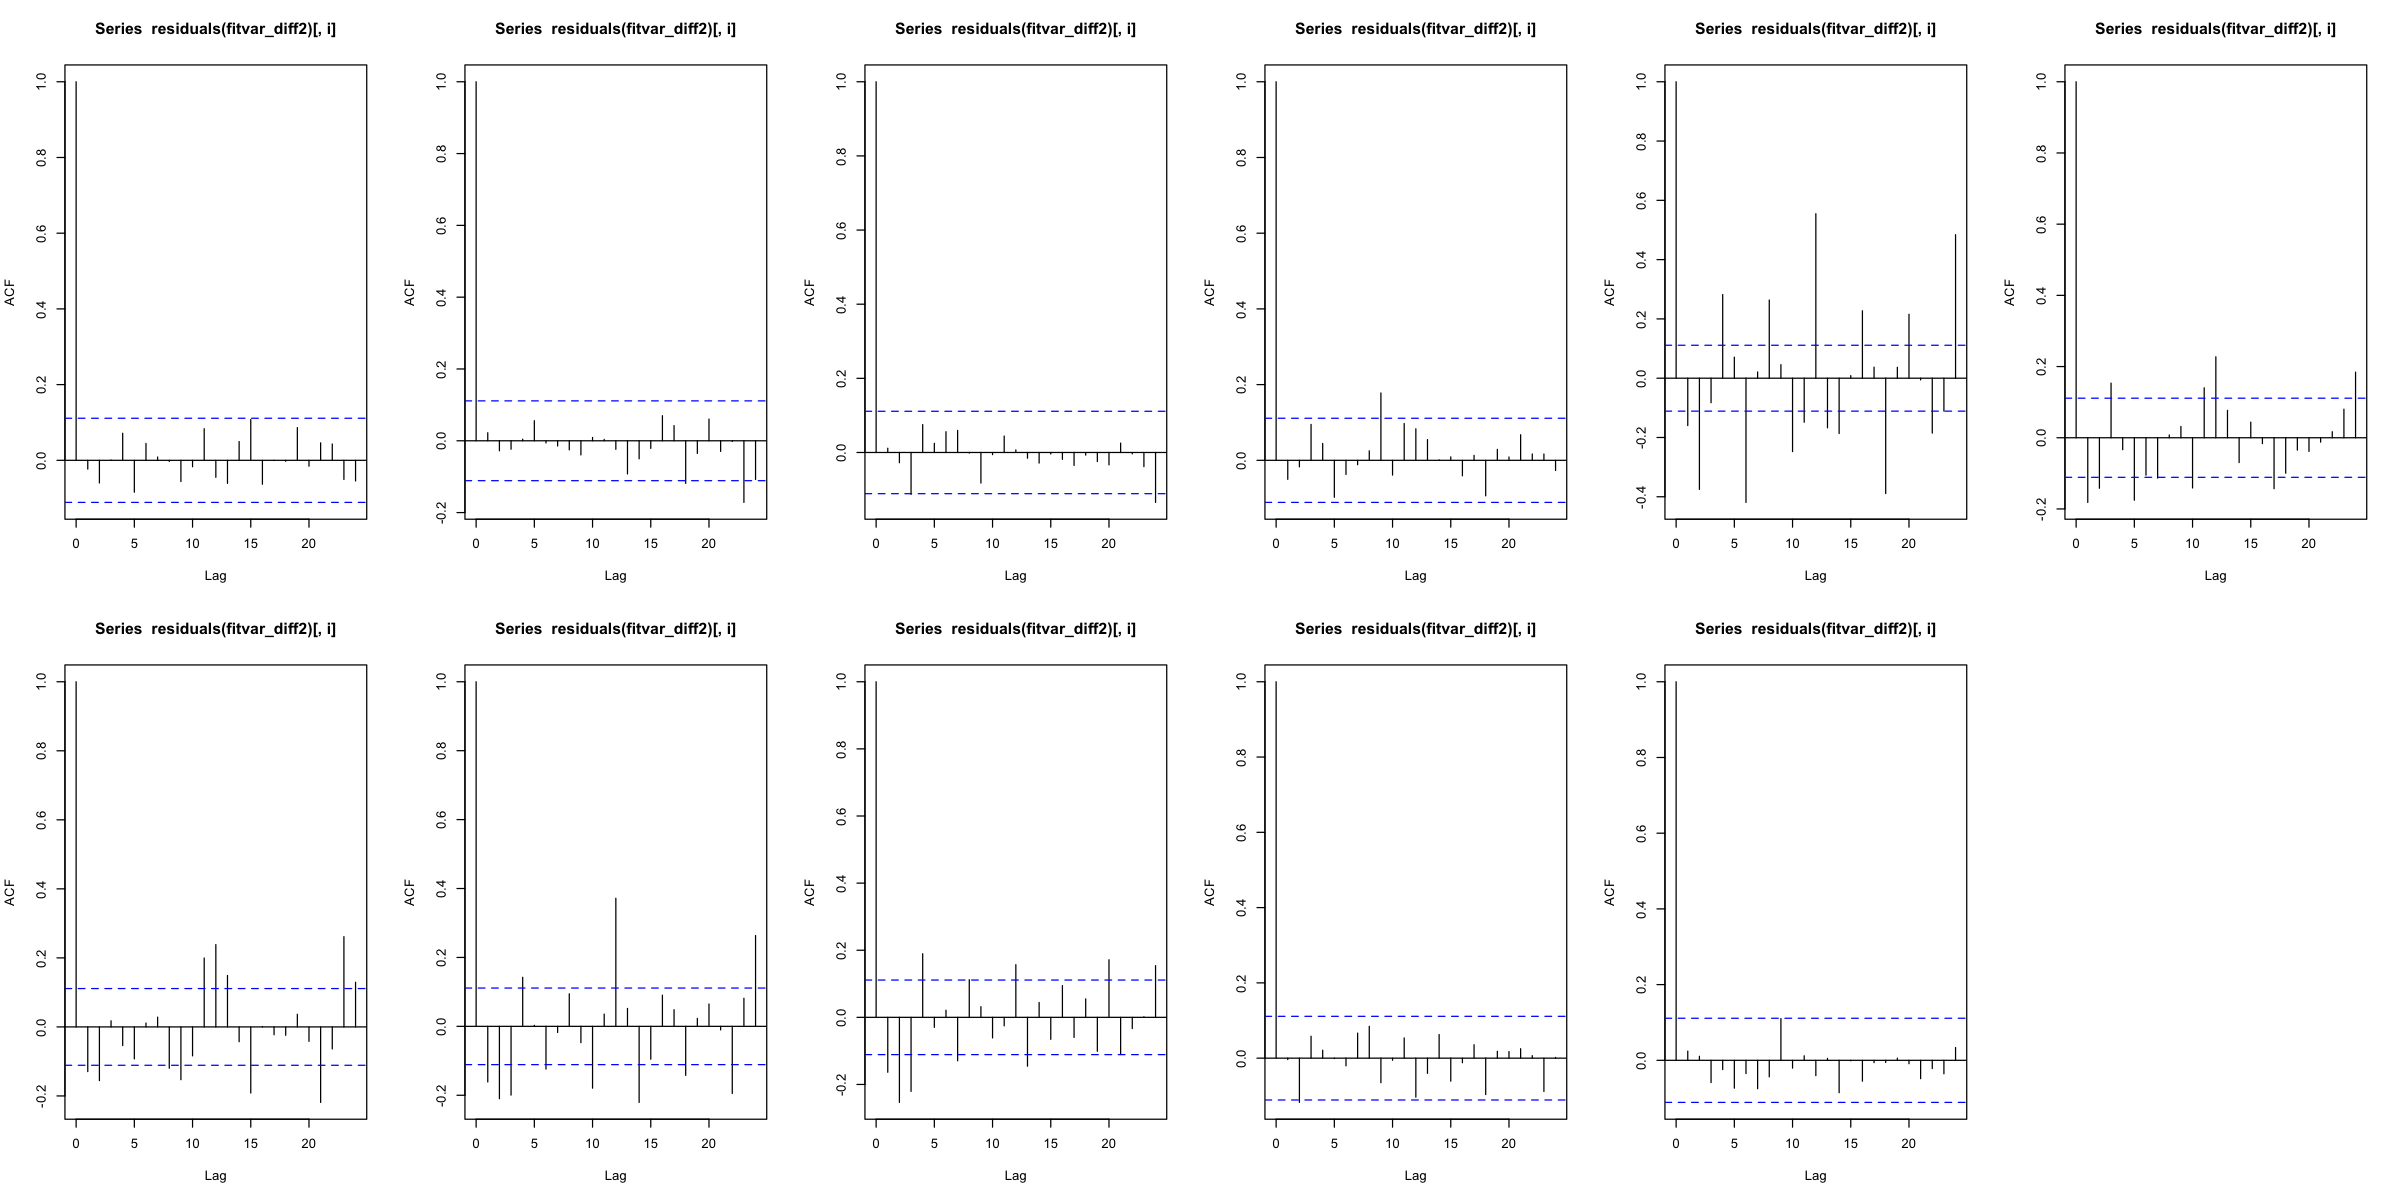

In [18]:
fitvar_diff2 = VAR(final_data_diff2, p=BIC_min, type = 'both')
options(repr.plot.width = 20, repr.plot.height = 10)
par(mfrow = c(2,6))
for (i in 1:11){
    acf(residuals(fitvar_diff2)[,i])
}

There seems no progress when taking another difference. Thus, I decide to use diff = 1.

## Fundamental Analysis

Since N.G production, N.G storage, and N.G. import dataset do not show stationary, I decided to drop these predictors for the final VAR model.

In [19]:
final_diff_data = final_data_diff[,-c(5,7,8)]
head(final_diff_data)
# Separate the dataset, first 80% for training, last 20% for the test
train_index = dim(final_diff_data)[1]*0.8

final_data_train = final_diff_data[1:train_index,];
dim(final_data_train)
final_data_test = final_diff_data[-(1:train_index),];
dim(final_data_test)

,y,WTI.Price,HO.Price,Drill.Act,NG.cons,NG.export,GDP,DD
1,1.2383742,-1.193494,-1.309681,-0.5323641,0.0000000,0.00000000,-2.188604,-0.08738952
2,0.7654678,-1.411990,-1.437408,-0.4627776,-0.2406453,0.03059169,-2.141892,-0.76900330
3,0.6365768,-1.510148,-1.572265,-0.3443626,-0.3052995,0.24217751,-2.185837,1.06540154
4,0.7080358,-1.619463,-1.612539,-0.3347825,-0.4907376,-0.14413334,-2.039699,-0.29936708
5,0.8109302,-1.522709,-1.653496,-0.2805090,-0.5617210,-0.28645905,-2.103323,0.77302356
6,0.7884574,-1.658987,-1.695160,-0.1626241,-0.6591697,-0.05240527,-2.044829,1.05029962


[1] 250   8

[1] 63  8

### 1. Using VAR()

In [20]:
fitvar_final = VAR(final_data_train, p = BIC_min, type = 'both')
forecast = predict(fitvar_final, n.ahead = dim(final_data_test)[1])
y_pred = forecast$fcst$y[,1];length(y_pred)

[1] 63

**Forecasting Performance Evaluation Criteria**

In [21]:
# MAE(Mean Absolute Error)
mae = sum(abs(y_test - y_pred)) / length(y_test)

# MSE(Mean Square Error)
mse = sum((y_test - y_pred)^2) / length(y_test)

# RMSE(Root Mean Square Error)
rmse = sqrt(mse)

# MAPE(Mean Absolute Percentage Error)
mape = sum(abs((y_test - y_pred)/y_test)) / length(y_test)

mae
mse
rmse
mape

[1] 0.3419854

[1] 0.2007929

[1] 0.4480992

[1] 0.3046544

### 2. Using Bayesian VAR()

In [22]:
bvar_model = bvar(final_data_train, lags = BIC_min, n_draw = 10000L, n_burn = 200L, verbose = FALSE)

# Print the summary of the model
summary(bvar_model)

Caught a warning while setting psi automatically:
simpleWarning in arima(x[, j], order = c(lags, 0, 0)): possible convergence problem: optim gave code = 1





Bayesian VAR consisting of 248 observations, 8 variables and 2 lags.
Time spent calculating: 8.86 secs
Hyperparameters: lambda 
Hyperparameter values after optimisation: 0.76978
Iterations (burnt / thinning): 10000 (200 / 1)
Accepted draws (rate): 9303 (0.949)

Numeric array (dimensions 17, 8) of coefficient values from a BVAR.
Median values:
                    y WTI.Price HO.Price Drill.Act NG.cons NG.export    GDP
constant        0.093    -0.034    0.023    -0.031   0.184     0.034  0.022
y-lag1          0.986     0.068    0.070     0.034  -0.411    -0.061 -0.018
WTI.Price-lag1  0.079     1.109    0.133     0.111   0.225    -0.057 -0.010
HO.Price-lag1  -0.036     0.279    1.140     0.017  -1.000     0.027  0.002
Drill.Act-lag1 -0.048    -0.148    0.004     1.461   0.295     0.054  0.032
NG.cons-lag1   -0.010    -0.061    0.022    -0.009   0.907     0.093 -0.002
NG.export-lag1  0.136     0.082   -0.019     0.006  -0.118    -0.430  0.000
GDP-lag1       -0.114     0.247   -0.011    -0.

In [23]:
# Forecasting
fitbvar = predict(bvar_model, bv_fcast(horizon = dim(final_data_test)[1]))

y_pred2 = colMeans(fitbvar$fcast[,,1])

In [24]:

# MAE(Mean Absolute Error)
mae2 = sum(abs(y_test - y_pred2)) / length(y_test)

# MSE(Mean Square Error)
mse2 = sum((y_test - y_pred2)^2) / length(y_test)

# RMSE(Root Mean Square Error)
rmse2 = sqrt(mse2)

# MAPE(Mean Absolute Percentage Error)
mape2 = sum(abs((y_test - y_pred2)/y_test)) / length(y_test)

mae2
mse2
rmse2
mape2

[1] 0.3475625

[1] 0.1835269

[1] 0.4284004

[1] 0.355769

The Bayesian VAR model do not perform better than the frequentist VAR. One of the reasons for this is because we do not know the prior distribution of the dataset.

## Technical Analysis

### 1. ARIMA

**Since I am going to use the natural gas price only, I import new daily dataset for henry hub natural gas price**

In [25]:
price_data = read.csv('henryhub.csv')
price_data = na.omit(price_data)
price_data$Date = as.Date(price_data$Date)
head(price_data)

price_data = price_data[-c(1:8),]

index_train = 6000

price_act = price_data[,2];length(price_act)
price_train = price_data[1:index_train,2];length(price_train)
price_test = price_data[(index_train+1):dim(price_data)[1],2];length(price_test)

,Date,Price
,<date>,<dbl>
1,1997-01-07,3.82
2,1997-01-08,3.80
3,1997-01-09,3.61
4,1997-01-10,3.92
5,1997-01-13,4.00
6,1997-01-14,4.01


[1] 6600

[1] 6000

[1] 600

In [26]:
dim(price_data)

[1] 6600    2

In [27]:
adf.test(price_act)


	Augmented Dickey-Fuller Test

data:  price_act
Dickey-Fuller = -3.9366, Lag order = 18, p-value = 0.01211
alternative hypothesis: stationary


In [28]:
# Logarithm
price_act_log = log(price_act)

In [29]:
adf.test(price_act_log)


	Augmented Dickey-Fuller Test

data:  price_act_log
Dickey-Fuller = -3.1963, Lag order = 18, p-value = 0.08846
alternative hypothesis: stationary


The Dickey-Fuller test, also known as the Augmented Dickey-Fuller (ADF) test, is a statistical test used to determine if a time series has a unit root, indicating non-stationarity. The null hypothesis of the Augmented Dickey-Fuller (ADF) test is that the time series has a unit root, indicating non-stationarity. In other words, the null hypothesis assumes that the time series is non-stationary and has a stochastic trend.
The alternative hypothesis, on the other hand, is that the time series is stationary. Rejecting the null hypothesis means that there is sufficient evidence to suggest that the time series is stationary, indicating the absence of a unit root.The results of ADF test suggests that there is no need to take logarithm on the dataset.

The result of ADF test on the natural gas price without log returns the p-value smaller than 0.05, and this shows that the dataset is stationary. On the other hand, the result of ADF test on the natural gas price with log actually returns the insignificant p-value, which means that we fail to reject the null hypothesis. Thus, we are going with the original dataset.

In [30]:
# Load the required packages
library(forecast)

# Create a time series object
ts_data <- ts(price_act, frequency = 365)

# Define the range of parameter values
p_values <- 0:3  # Range of autoregressive (AR) order
d_values <- 0:3  # Range of differencing (I) order
q_values <- 0:3  # Range of moving average (MA) order

# Initialize variables to store results
best_bic <- Inf # Initialize with a high value
best_model <- 0

# Iterate through parameter combinations
for (p in p_values) {
  for (d in d_values) {
    for (q in q_values) {
      # Fit ARIMA model
      model <- arima(ts_data, order = c(p, d, q))
      
      # Calculate BIC
      bic <- BIC(model)
      
      # Check if current model has lower BIC
      if (bic < best_bic) {
        best_bic <- bic
        best_model <- model
      }
    }
  }
}

# Print the selected model and its BIC
print(best_model)
print(best_bic)


Warning message in arima(ts_data, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”



Call:
arima(x = ts_data, order = c(p, d, q))

Coefficients:
          ar1     ar2      ma1      ma2
      -0.0180  0.2203  -0.0749  -0.4672
s.e.   0.0466  0.0438   0.0428   0.0415

sigma^2 estimated as 0.1325:  log likelihood = -2695.23,  aic = 5400.45
[1] 5434.424


The BIC returns the ARIMA model with the parameters p = 2, d = 0, q = 2.

**Based on the BIC values, ARIMA(2,0,2) model has been selected**

initial  value 0.783830 
iter   2 value -0.025156
iter   3 value -1.144466
iter   4 value -1.312818
iter   5 value -1.317670
iter   6 value -1.329308
iter   7 value -1.344083
iter   8 value -1.346240
iter   9 value -1.346729
iter  10 value -1.348804
iter  11 value -1.350872
iter  12 value -1.352936
iter  13 value -1.354022
iter  14 value -1.354064
iter  15 value -1.354485
iter  16 value -1.354719
iter  17 value -1.354728
iter  18 value -1.354760
iter  19 value -1.354802
iter  20 value -1.354843
iter  21 value -1.354857
iter  22 value -1.354860
iter  23 value -1.354860
iter  23 value -1.354860
iter  23 value -1.354860
final  value -1.354860 
converged
initial  value -1.354145 
iter   2 value -1.354145
iter   3 value -1.354145
iter   4 value -1.354146
iter   5 value -1.354146
iter   6 value -1.354146
iter   7 value -1.354146
iter   8 value -1.354147
iter   9 value -1.354147
iter  10 value -1.354147
iter  11 value -1.354148
iter  12 value -1.354148
iter  12 value -1.354148
final  value -1

$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1     ar2     ma1      ma2   xmean
      0.9431  0.0524  0.0709  -0.2590  4.1664
s.e.  0.0464  0.0461  0.0446   0.0126  0.5801

sigma^2 estimated as 0.0666:  log likelihood = -388.74,  aic = 789.49

$degrees_of_freedom
[1] 5995

$ttable
      Estimate     SE  t.value p.value
ar1     0.9431 0.0464  20.3220  0.0000
ar2     0.0524 0.0461   1.1365  0.2558
ma1     0.0709 0.0446   1.5869  0.1126
ma2    -0.2590 0.0126 -20.6210  0.0000
xmean   4.1664 0.5801   7.1822  0.0000

$AIC
[1] 0.1315815

$AICc
[1] 0.1315832

$BIC
[1] 0.138281


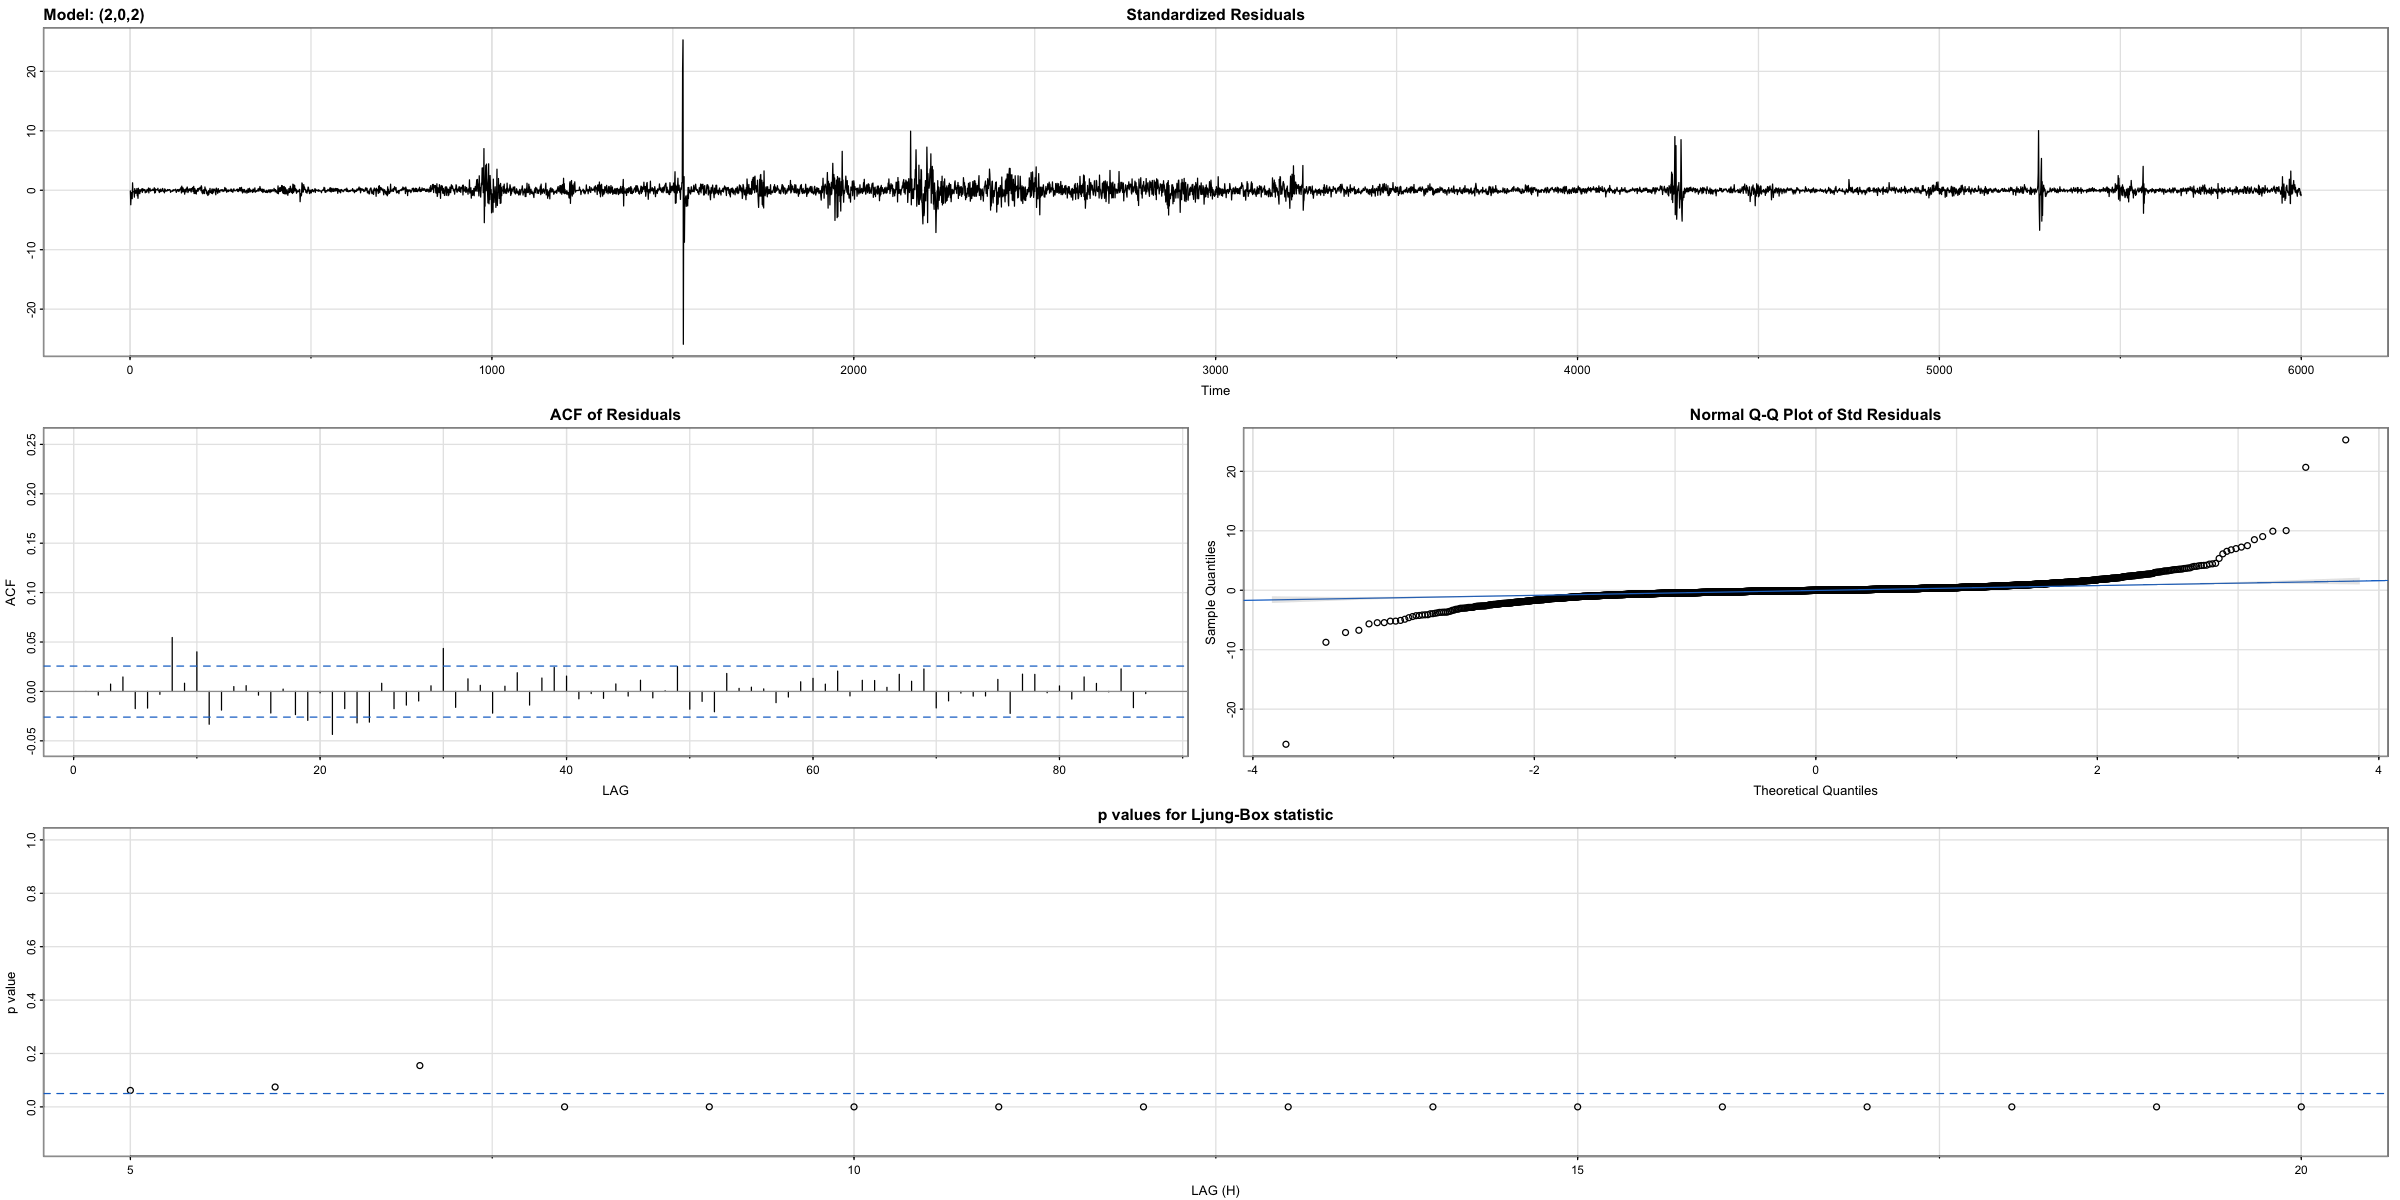

In [31]:
sarima(price_train, 2,0,2)

The Ljung-Box test is a statistical test used to assess the presence of autocorrelation in a time series. It is commonly applied to residual or error series from a fitted time series model, such as an ARIMA model. The test is based on the Ljung-Box statistic, which is calculated as the sum of squared autocorrelations at different lags. The null hypothesis of the test assumes that the autocorrelations of the series are zero (indicating no significant autocorrelation). The alternative hypothesis suggests the presence of autocorrelation in the series.

The Ljung-Box test computes the test statistic and compares it against critical values from the chi-square distribution. If the test statistic exceeds the critical value at a chosen significance level, the null hypothesis is rejected, indicating the presence of significant autocorrelation. On the other hand, if the test statistic is smaller than the critical value, the null hypothesis is not rejected, suggesting the absence of significant autocorrelation.

The p-values for Ljung-Box statistic above shows that there are some minor autocorrelation in the beginning but overall, no significant autocorrelations are observed.

In [32]:
arima = arima(price_train, order = c(2,0,2))

In [33]:
d1 = data.frame(c(as.numeric(fitted(arima)), as.numeric(predict(arima, n.ahead = length(price_test))$pred)), 
                price_act, price_data$Date)
names(d1) <- c("Fitted", "Actual", "Date")

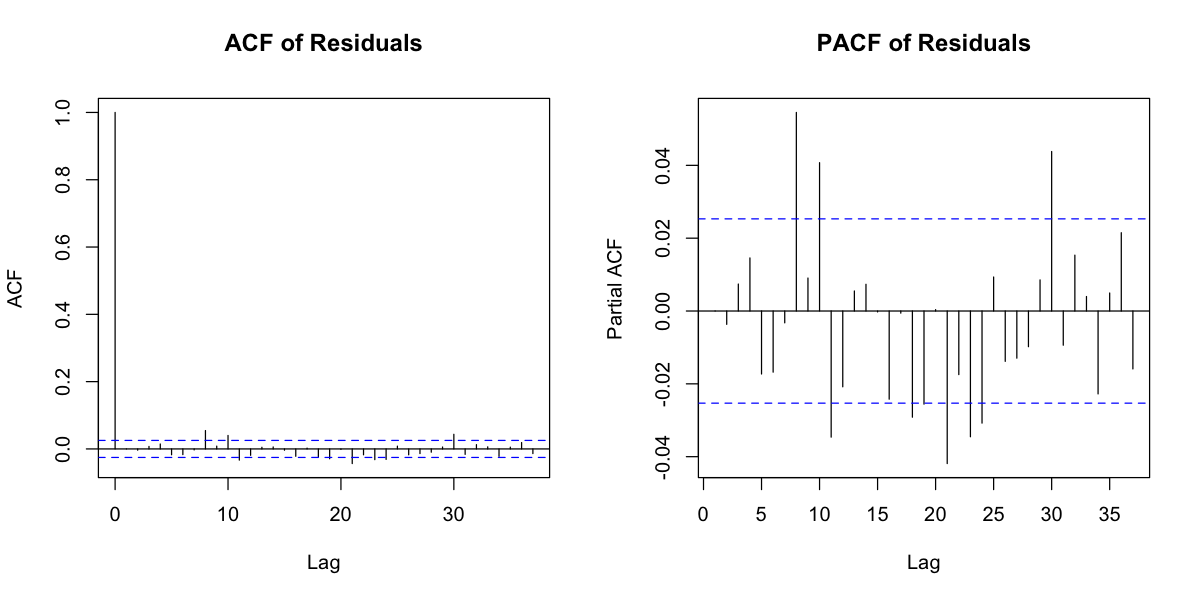

In [34]:
residuals = residuals(arima)

options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow = c(1,2))


acf(residuals, main = "ACF of Residuals")
pacf(residuals, main = "PACF of Residuals")

In [35]:
p = predict(arima, n.ahead = length(price_test), interval="prediction", level=0.95)

lb = p$pred - 1.96*p$se
ub = p$pred + 1.96*p$se

In [36]:
length(price_data$Date[(index_train+1):dim(price_data)[1]])

[1] 600

In [37]:
### 95% forecast credible interval
confidence_interval = cbind.data.frame(
  lb, ub, price_data$Date[(index_train+1):dim(price_data)[1]])
names(confidence_interval) <- c("LL", "UL", "Date")

dd1 <- left_join(d1, confidence_interval, by="Date")

# MAE(Mean Absolute Error)
mae = sum(abs(dd1[,1] - dd1[,2])) / dim(dd1)[1]

# MSE(Mean Square Error)
mse = sum((dd1[,1] - dd1[,2])^2) / dim(dd1)[1]

# RMSE(Root Mean Square Error)
rmse = sqrt(mse)

# MAPE(Mean Absolute Percentage Error)
mape = sum(abs((dd1[,1] - dd1[,2])/dd1[,2])) / dim(dd1)[1]

mae
mse
rmse
mape



[1] 0.2652665

[1] 0.5759506

[1] 0.7589141

[1] 0.05443782

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


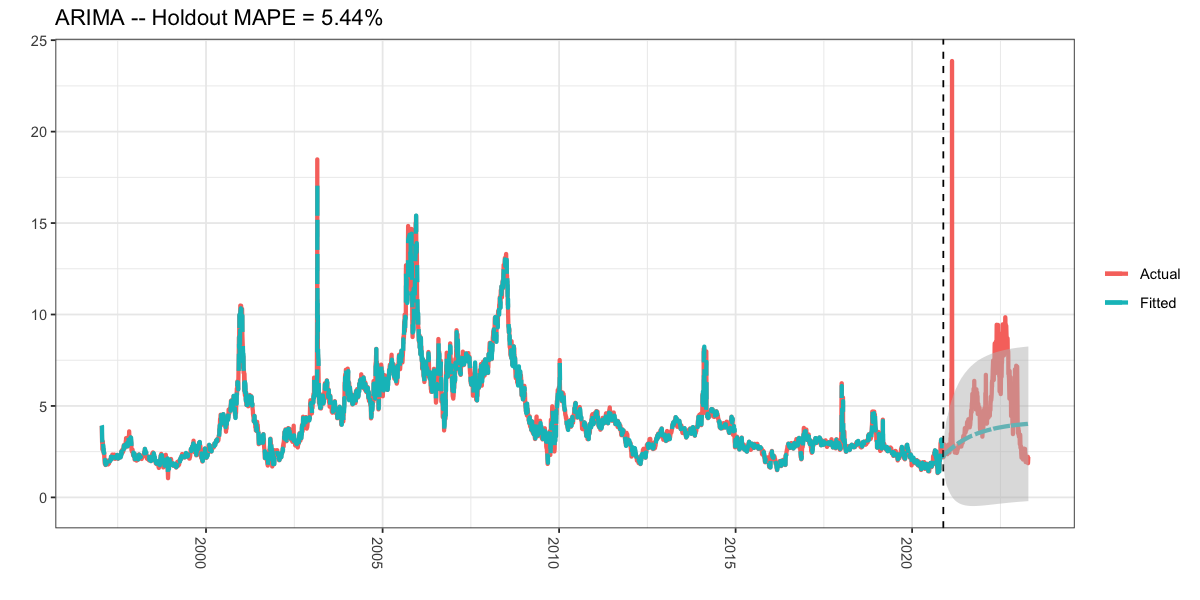

In [38]:
# Plot
ggplot(data=dd1, aes(x=Date)) +
  geom_line(aes(y=Actual, colour = "Actual"), size=1.2) +
  geom_line(aes(y=Fitted, colour = "Fitted"), size=1.2, linetype=2) +
  theme_bw() + theme(legend.title = element_blank()) +
  ylab("") + xlab("") +
  geom_vline(xintercept = price_data$Date[index_train], linetype = 2)+
  geom_ribbon(aes(ymin=LL, ymax=UL), fill="grey", alpha=0.5)+
   ggtitle(paste0("ARIMA -- Holdout MAPE = ", round(100*mape,2), "%")) + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0))


### Bayesian ARIMA

In [39]:
ss = AddLocalLinearTrend(list(), price_train)
# ss = AddSeasonal(ss, price_train, nseasons = 365)
bsts.model = bsts(price_train, state.specification = ss, niter = 10000, ping = 0, seed = 123)

burn = SuggestBurn(0.1, bsts.model)

p2 = predict.bsts(bsts.model, horizon = length(price_test), burn = burn, quantiles = c(.025, .975), olddata = price_train)

d2 <- data.frame(
    c(as.numeric(-colMeans(bsts.model$one.step.prediction.errors[-(1:burn),]) + price_train), as.numeric(p2$mean)), price_act, price_data$Date)
names(d2) <- c("Fitted", "Actual", "Date")


# 95% forecast credible interval
credible.interval <- cbind.data.frame(
  as.numeric(p2$interval[1,]),
  as.numeric(p2$interval[2,]), 
  price_data$Date[index_train:length(price_act)])
names(credible.interval) <- c("LL", "UL", "Date")

dd2 <- left_join(d2, credible.interval, by="Date")

# R-Squared
rss2 = sum((dd2[,1] - dd2[,2])^2) / dim(dd2)[1]
tss2 = sum((dd2[,2] - mean(dd2[,2]))^2) / dim(dd2)[1]
r_sqrd2 = 1 - rss2 / tss2

# MAE(Mean Absolute Error)
mae2 = sum(abs(dd2[,1] - dd2[,2])) / dim(dd2)[1]

# MSE(Mean Square Error)
mse2 = sum((dd2[,1] - dd2[,2])^2) / dim(dd2)[1]

# RMSE(Root Mean Square Error)
rmse2 = sqrt(mse2)

# MAPE(Mean Absolute Percentage Error)
mape2 = sum(abs((dd2[,1] - dd2[,2])/dd2[,2])) / dim(dd2)[1]

r_sqrd2
mae2
mse2
rmse2
mape2



ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 600, 601


In [ ]:
# Plot
ggplot(data=dd2, aes(x=Date)) +
  geom_line(aes(y=Actual, colour = "Actual"), size=1.2) +
  geom_line(aes(y=Fitted, colour = "Fitted"), size=1.2, linetype=2) +
  theme_bw() + theme(legend.title = element_blank()) +
  ylab("") + xlab("") +
  geom_vline(xintercept = price_data$Date[index_train], linetype = 2)+
  geom_ribbon(aes(ymin=LL, ymax=UL), fill="grey", alpha=0.5)+
   ggtitle(paste0("ARIMA -- Holdout MAPE = ", round(100*mape2,2), "%")) + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0))